In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [19]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [20]:
tracks.shape

(170653, 19)

In [21]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [22]:
tracks.isnull().sum()


valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

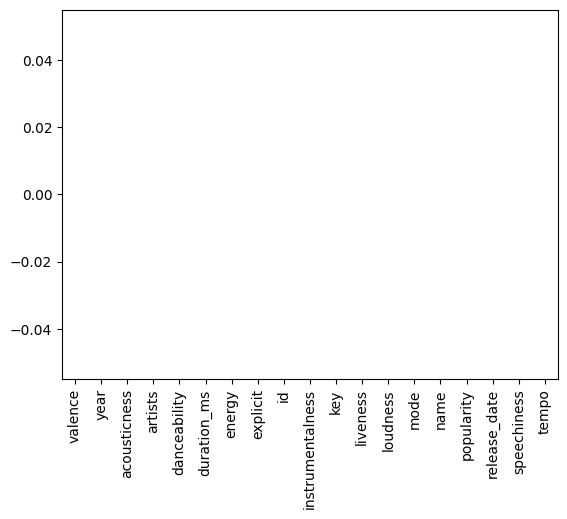

In [23]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [24]:
print(tracks.columns)


Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')


In [25]:
tracks = tracks.drop(['id'], axis=1)  # Drop only 'id' since 'id_artists' is not present


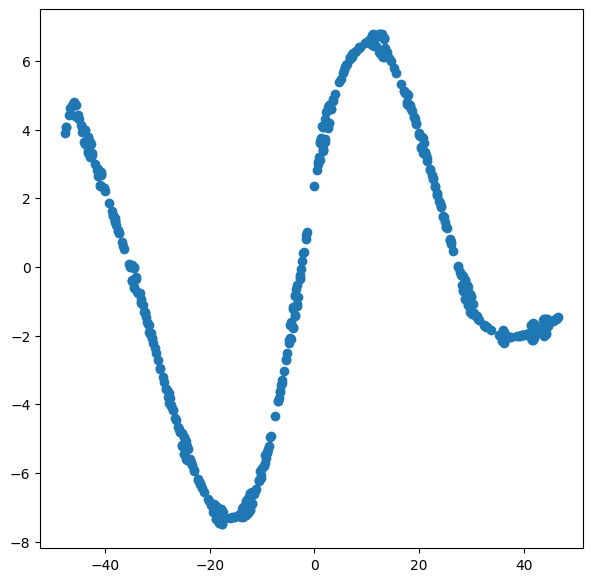

In [26]:
a=tracks
model = TSNE(n_components = 2, random_state = 0)
numeric_data = a.select_dtypes(include=['number'])  # Keep only numeric columns
tsne_data = model.fit_transform(numeric_data.head(500))
plt.figure(figsize = (7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.show()

In [27]:
tracks['name'].nunique(), tracks.shape


(133638, (170653, 18))

In [28]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)

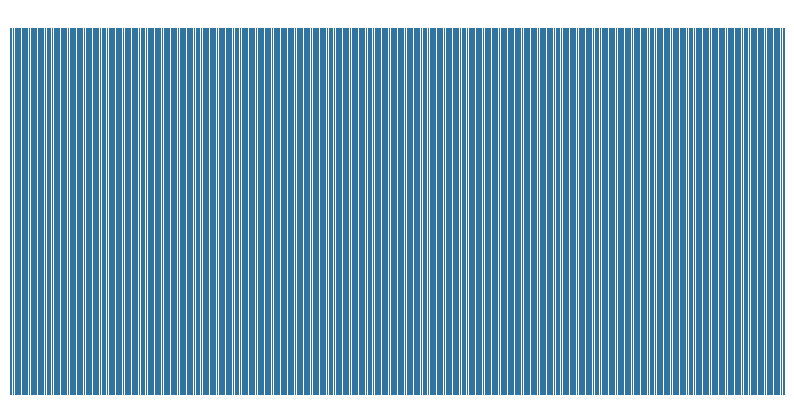

In [31]:
plt.figure(figsize = (10, 5))
sb.countplot(tracks['year'])
plt.axis('off')
plt.show()

In [32]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)
 
len(floats)

9

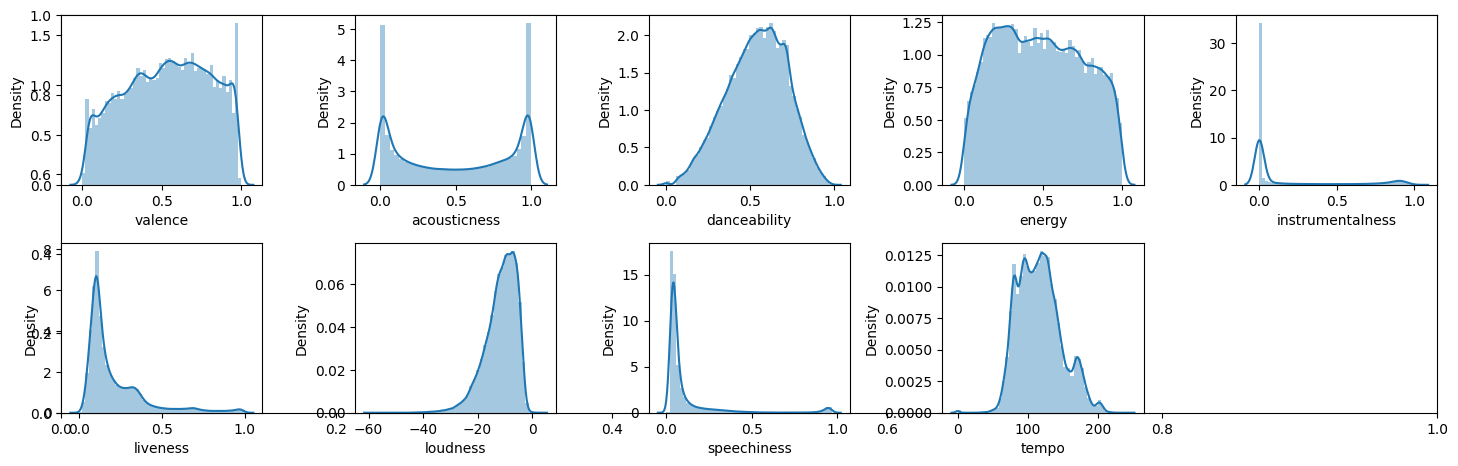

In [33]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [42]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genres'])

KeyError: 'genres'

In [43]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)


In [35]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
  num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
    num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [47]:
import pandas as pd

# Load dataset
data = pd.read_csv("tracks_records.csv")

# Display column names
print(data.columns)


Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')


In [48]:

import pandas as pd

# Load your dataset (Ensure 'tracks.csv' is the correct filename)
data = pd.read_csv("tracks_records.csv")  # Replace with the actual file path

# Ensure genres column is properly preprocessed
data['genres'] = data['genres'].astype(str)

# Initialize TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
song_vectorizer = TfidfVectorizer()

# Fit and transform the genre text data
song_vectorizer.fit(data['genres'])


# Initialize TF-IDF Vectorizer
song_vectorizer = TfidfVectorizer()

# Fit and transform the genre text data
song_vectorizer.fit(data['genres'])


def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:7])

KeyError: 'genres'

In [40]:
#recommend_songs('Shape of You')


NameError: name 'song_vectorizer' is not defined

In [38]:
#recommend_songs('Love Someone')


NameError: name 'song_vectorizer' is not defined

In [ ]:
#recommend_songs('Love me like you do')
